# DNS Utilization Prediction

In [11]:
import numpy as np
import pandas as pd
from keras.models import load_model

In [12]:

preprocessed_df=pd.read_csv('Data/preprocessed_data.csv')
preprocessed_df.drop(['Unnamed: 0'],1,inplace=True)


df=preprocessed_df.loc[preprocessed_df['Application'] == 'dns']
df=df[['Timestamp','Utilization(kb)']]
training_set=df[0:len(df)-150]
print(training_set.shape)
training_set_sliced = training_set.iloc[:, 1:2].values

(15982, 2)


In [16]:
real_pattern_prediction=df[len(df)-150:]


from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set_sliced)


# Getting the Random predictiond data
dataset_total = pd.concat((training_set['Utilization(kb)'], real_pattern_prediction['Utilization(kb)']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(real_pattern_prediction) - 12:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(12, len(real_pattern_prediction)+12):
    X_test.append(inputs[i-12:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [14]:

regressor_dns_1=load_model('new_model/dns-relu-3(1000 epo- 128-64 neuron-12 time).h5')

In [17]:
predicted_pattern = regressor_dns_1.predict(X_test)
#predicted_pattern = sc.inverse_transform(predicted_pattern)

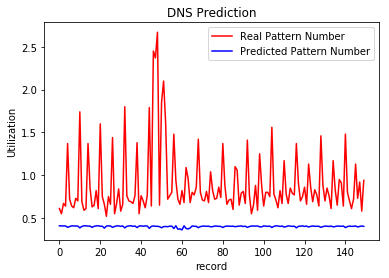

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
real_pattern_prediction=real_pattern_prediction.iloc[:, 1:2].values
# Visualising the results
plt.plot(real_pattern_prediction, color = 'red', label = 'Real Pattern Number')
plt.plot(predicted_pattern, color = 'blue', label = 'Predicted Pattern Number')
plt.title('DNS Prediction')
plt.xlabel('record')
plt.ylabel('Utilization')
plt.legend()
plt.show()

In [30]:
regressor_dns_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 200, 50)           10400     
_________________________________________________________________
dropout_18 (Dropout)         (None, 200, 50)           0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_19 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [2]:
from keras.models import load_model
regressor_dns_2=load_model('new_model/dns-relu(650 epo- 128-64 neuron-12 time).h5')

In [34]:
predicted_pattern = regressor_dns_2.predict(X_test)
predicted_pattern = sc.inverse_transform(predicted_pattern)

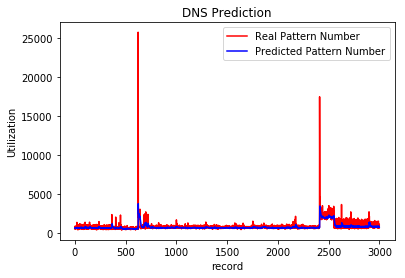

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
#real_pattern_prediction=real_pattern_prediction.iloc[:, 1:2].values
# Visualising the results
plt.plot(real_pattern_prediction, color = 'red', label = 'Real Pattern Number')
plt.plot(predicted_pattern, color = 'blue', label = 'Predicted Pattern Number')
plt.title('DNS Prediction')
plt.xlabel('record')
plt.ylabel('Utilization')
plt.legend()
plt.show()

In [42]:
regressor_dns_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 200, 50)           10400     
_________________________________________________________________
dropout_18 (Dropout)         (None, 200, 50)           0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_19 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [37]:
preprocessed_df=pd.read_csv('Data/preprocessed_data.csv')
preprocessed_df.drop(['Unnamed: 0'],1,inplace=True)


df=preprocessed_df.loc[preprocessed_df['Application'] == 'dns']
df=df[['Timestamp','Utilization(bps)']]
training_set=df[0:len(df)-3000]
print(training_set.shape)
training_set_sliced = training_set.iloc[:, 1:2].values

(13132, 2)


In [38]:
real_pattern_prediction=df[len(df)-3000:]


from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set_sliced)


# Getting the Random predictiond data
dataset_total = pd.concat((training_set['Utilization(bps)'], real_pattern_prediction['Utilization(bps)']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(real_pattern_prediction) - 100:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(100, len(real_pattern_prediction)+100):
    X_test.append(inputs[i-100:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [39]:
from keras.models import load_model
regressor_dns_3=load_model('dns(100 epo- 100 neuron-100 time).h5')

In [40]:
predicted_pattern = regressor_dns_3.predict(X_test)
predicted_pattern = sc.inverse_transform(predicted_pattern)

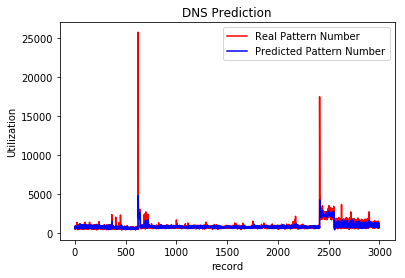

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
real_pattern_prediction=real_pattern_prediction.iloc[:, 1:2].values
# Visualising the results
plt.plot(real_pattern_prediction, color = 'red', label = 'Real Pattern Number')
plt.plot(predicted_pattern, color = 'blue', label = 'Predicted Pattern Number')
plt.title('DNS Prediction')
plt.xlabel('record')
plt.ylabel('Utilization')
plt.legend()
plt.show()

In [43]:
regressor_dns_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 100, 100)          40800     
_________________________________________________________________
lstm_8 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________


In [50]:
preprocessed_df=pd.read_csv('Data/preprocessed_data.csv')
preprocessed_df.drop(['Unnamed: 0'],1,inplace=True)


df=preprocessed_df.loc[preprocessed_df['Application'] == 'dns']
df=df[['Timestamp','Utilization(bps)']]
training_set=df[0:len(df)-3000]
print(training_set.shape)
training_set_sliced = training_set.iloc[:, 1:2].values

(13132, 2)


In [51]:
real_pattern_prediction=df[len(df)-3000:]


from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set_sliced)


# Getting the Random predictiond data
dataset_total = pd.concat((training_set['Utilization(bps)'], real_pattern_prediction['Utilization(bps)']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(real_pattern_prediction) - 120:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(120, len(real_pattern_prediction)+120):
    X_test.append(inputs[i-120:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [52]:
from keras.models import load_model
regressor_dns_4=load_model('dns(100 epo- 75 neuron-120 time-rmsprop).h5')

In [53]:
predicted_pattern = regressor_dns_4.predict(X_test)
predicted_pattern = sc.inverse_transform(predicted_pattern)

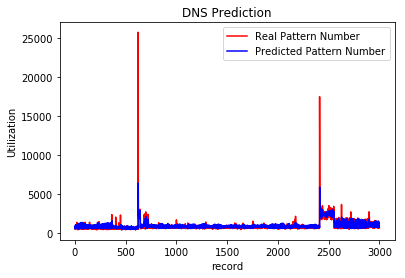

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
real_pattern_prediction=real_pattern_prediction.iloc[:, 1:2].values
# Visualising the results
plt.plot(real_pattern_prediction, color = 'red', label = 'Real Pattern Number')
plt.plot(predicted_pattern, color = 'blue', label = 'Predicted Pattern Number')
plt.title('DNS Prediction')
plt.xlabel('record')
plt.ylabel('Utilization')
plt.legend()
plt.show()

In [55]:
regressor_dns_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_17 (LSTM)               (None, 120, 75)           23100     
_________________________________________________________________
lstm_18 (LSTM)               (None, 75)                45300     
_________________________________________________________________
dropout_9 (Dropout)          (None, 75)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 76        
Total params: 68,476
Trainable params: 68,476
Non-trainable params: 0
_________________________________________________________________


In [2]:
preprocessed_df=pd.read_csv('Data/preprocessed_data.csv')
preprocessed_df.drop(['Unnamed: 0'],1,inplace=True)


df=preprocessed_df.loc[preprocessed_df['Application'] == 'dns']
df=df[['Timestamp','Utilization(bps)']]
training_set=df[0:len(df)-150]
print(training_set.shape)
training_set_sliced = training_set.iloc[:, 1:2].values

(15982, 2)


In [3]:
real_pattern_prediction=df[len(df)-150:]


from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set_sliced)


# Getting the Random predictiond data
dataset_total = pd.concat((training_set['Utilization(bps)'], real_pattern_prediction['Utilization(bps)']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(real_pattern_prediction) - 12:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(12, len(real_pattern_prediction)+12):
    X_test.append(inputs[i-12:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [4]:
from keras.models import load_model
regressor_dns_relu=load_model('model/task-scheduler.h5')

In [5]:
regressor_dns_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 12, 100)           40800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [7]:
predicted_pattern = regressor_dns_relu.predict(X_test)
predicted_pattern = sc.inverse_transform(predicted_pattern)

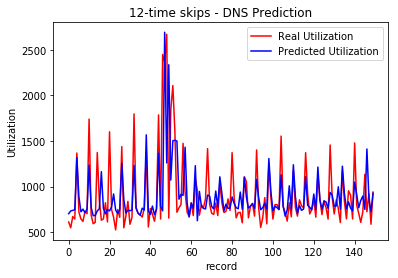

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
#real_pattern_prediction=real_pattern_prediction.iloc[:, 1:2].values
# Visualising the results
plt.plot(real_pattern_prediction, color = 'red', label = 'Real Utilization')
plt.plot(predicted_pattern, color = 'blue', label = 'Predicted Utilization')
plt.title('12-time skips - DNS Prediction')
plt.xlabel('record')
plt.ylabel('Utilization')
plt.legend()
plt.show()

In [12]:
preprocessed_df=pd.read_csv('Data/preprocessed_data.csv')
preprocessed_df.drop(['Unnamed: 0'],1,inplace=True)


df=preprocessed_df.loc[preprocessed_df['Application'] == 'dns']
df=df[['Timestamp','Utilization(bps)']]
training_set=df[0:len(df)-150]
print(training_set.shape)
training_set_sliced = training_set.iloc[:, 1:2].values

(15982, 2)


In [13]:
real_pattern_prediction=df[len(df)-150:]


from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set_sliced)


# Getting the Random predictiond data
dataset_total = pd.concat((training_set['Utilization(bps)'], real_pattern_prediction['Utilization(bps)']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(real_pattern_prediction) - 15:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(15, len(real_pattern_prediction)+15):
    X_test.append(inputs[i-15:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [14]:
from keras.models import load_model
regressor_dns_relu=load_model('model/task-scheduler.h5')

In [15]:
regressor_dns_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 15, 100)           40800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [16]:
predicted_pattern = regressor_dns_relu.predict(X_test)
predicted_pattern = sc.inverse_transform(predicted_pattern)

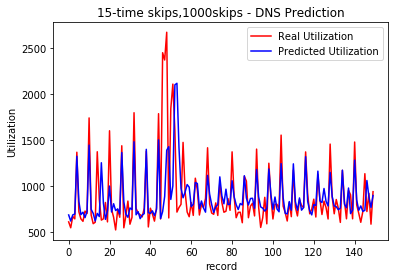

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
#real_pattern_prediction=real_pattern_prediction.iloc[:, 1:2].values
# Visualising the results
plt.plot(real_pattern_prediction, color = 'red', label = 'Real Utilization')
plt.plot(predicted_pattern, color = 'blue', label = 'Predicted Utilization')
plt.title('15-time skips,1000skips - DNS Prediction')
plt.xlabel('record')
plt.ylabel('Utilization')
plt.legend()
plt.show()

# Https Utilization Prediction 

In [3]:
preprocessed_df=pd.read_csv('Data/preprocessed_data.csv')
preprocessed_df.drop(['Unnamed: 0'],1,inplace=True)


df=preprocessed_df.loc[preprocessed_df['Application'] == 'https']
df=df[['Timestamp','Utilization(kb)']]
training_set=df[0:len(df)-150]
print(training_set.shape)
training_set_sliced = training_set.iloc[:, 1:2].values

(15982, 2)


In [4]:
real_pattern_prediction=df[len(df)-150:]


from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set_sliced)


# Getting the Random predictiond data
dataset_total = pd.concat((training_set['Utilization(kb)'], real_pattern_prediction['Utilization(kb)']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(real_pattern_prediction) - 100:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(100, len(real_pattern_prediction)+100):
    X_test.append(inputs[i-100:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [6]:
regressor_https_1=load_model('model/https(75 epo- 75&50 neuron-100 time).h5')

In [7]:
predicted_pattern = regressor_https_1.predict(X_test)
predicted_pattern = sc.inverse_transform(predicted_pattern)

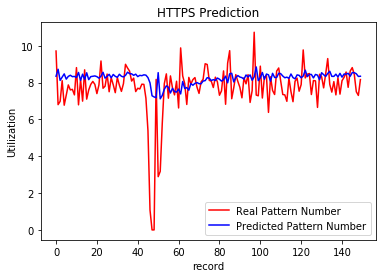

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
real_pattern_prediction=real_pattern_prediction.iloc[:, 1:2].values
# Visualising the results
plt.plot(real_pattern_prediction, color = 'red', label = 'Real Pattern Number')
plt.plot(predicted_pattern, color = 'blue', label = 'Predicted Pattern Number')
plt.title('HTTPS Prediction')
plt.xlabel('record')
plt.ylabel('Utilization')
plt.legend()
plt.show()

In [56]:
regressor_https_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 75)           23100     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                25200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 48,351
Trainable params: 48,351
Non-trainable params: 0
_________________________________________________________________


# Sales Force Application Utilization Prediction

In [2]:
preprocessed_df=pd.read_csv('Data/preprocessed_data.csv')
preprocessed_df.drop(['Unnamed: 0'],1,inplace=True)


df=preprocessed_df.loc[preprocessed_df['Application'] == 'salesforce']
df=df[['Timestamp','Utilization(bps)']]
training_set=df[0:len(df)-3000]
print(training_set.shape)
training_set_sliced = training_set.iloc[:, 1:2].values

(6219, 2)


In [3]:
real_pattern_prediction=df[len(df)-3000:]


from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set_sliced)


# Getting the Random predictiond data
dataset_total = pd.concat((training_set['Utilization(bps)'], real_pattern_prediction['Utilization(bps)']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(real_pattern_prediction) - 150:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(150, len(real_pattern_prediction)+150):
    X_test.append(inputs[i-150:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [9]:
regressor_salesforce_1=load_model('model/salesforce-sgd(200 epo- 50 neuron-150 time).h5')

KeyError: 0

In [10]:
import keras
print(keras.__version__)

2.1.6
